# PCA

Principal Component Analysis

## Introdução

PCA (Principal Component Analysis) é um algoritmo de redução de dimensionalidade que tem como objetivo principal acelerar o treinamento de modelos, simplificando os dados sem perder informações significativas. A ideia é reduzir a dimensionalidade do dataset, preservando ao máximo variância dos dados.  

Além de melhorar a eficiência computacional, o PCA também é uma ferramenta poderosa para visualização de dados. Ao reduzir o número de dimensões para 2 ou 3, é possível representar de forma condensada conjuntos de dados de alta dimensionalidade, permitindo uma visão mais clara e intuitiva das relações entre os dados. Muitas vezes, essa visualização ajuda a identificar padrões, como os clusters.  

Esse algoritmo é particularmente útil quando se trabalha com grandes volumes de dados e muitas variáveis e quando as variáveis têm grande correlação entre si, pois ajuda a reduzir o tempo de execução dos modelos, mantendo a maior parte da variabilidade dos dados.  

No entanto, é crucial lembrar que a redução de dimensionalidade deve ser usada com cautela. Antes de aplicá-la, recomenda-se sempre que possível treinar os modelos utilizando os dados originais, pois, ao reduzir a dimensionalidade, costuma haver perda de informações (não necessariamente, mas em geral, sim). Esse comprometimento *pode* impactar negativamente o desempenho de alguns modelos.  

Pode-se dizer que o PCA é literalmente a quebra ou dobra das dimensoes existentes em menos dimensões que captem bem a variância de todas as dimensões originais (lê-se variaveis quando me refiro a dimensão).

### Taxa de Variância

É possível também checar a taxa de variância explicada em nossos componentes a partir do atributo _explained_variance_ratio__ (ex: pca.explained_variance_ratio_)

### Escolhendo o Número Adequado de Dimensões

A escolha do número de dimensões deve ser definida pela quantidade (%) de variância que deve ser mantida (que seja suficientemente grande, a ponto que não se perca muita informação - por exemplo, 95%), a não ser que o objetivo seja visualizar os dados - nesse caso, é necessário reduzir para 2 ou 3.  
Com o código abaixo é possivel calcular o número mínimo de dimensoes necessárias para preservar 95% da variância do conjunto:  

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95)
# X_reduced = pca.fit_transform(X_train)

Outra opção seria plotar a variância explicada como uma função do número de dimensões (plotando um cumsum). Em geral, haverá uma cruva em forma de cotovelo (da mesma maneira quando precisamos selecionar o numero de cluster em Kmeans) em que a variância explicada rapidamente para de crescer. Nesse Caso, voce pode observar em que dimensãoo modelo passa a perder muita variância! Exemplo abaixo:  

Número de dimensoes no dataset original: 4


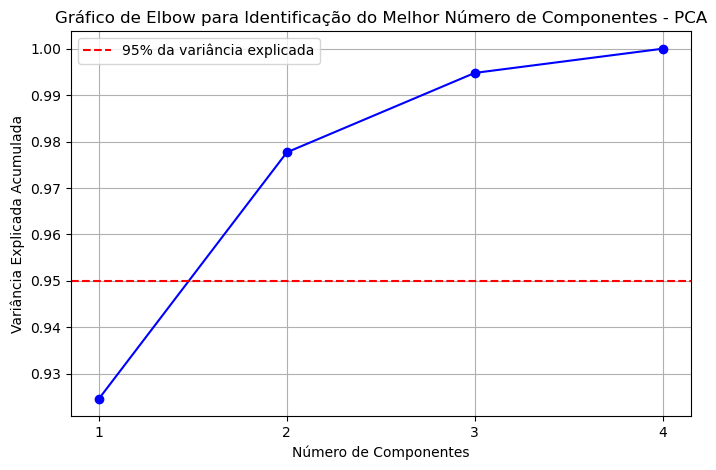

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris  # Exemplo com o dataset Iris

# Carregando dados 
X, _ = load_iris(return_X_y=True)
print(f'Número de dimensoes no dataset original: {X.shape[1]}')
# Aplicar PCA sem limitar o número de componentes
pca = PCA()
pca.fit(X)

# Variância explicada acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) # soma acumulada -> array([0.92461872, 0.97768521, 0.99478782, 1.00])

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Gráfico de Elbow para Identificação do Melhor Número de Componentes - PCA')
plt.grid()


# Definindo a escala do eixo X de 1 em 1
plt.xticks(np.arange(1, len(cumulative_variance) + 1, 1)) # ticks de 1 a 5, de 1 em 1

# Adicionar uma linha horizontal para ver onde a variância explicada atinge 90%
plt.axhline(y=0.95, color='r', linestyle='--', label='95% da variância explicada')
plt.legend()

plt.show()

> Nesso caso, caso eu quisesse manter pelo menos 95% da variância dos meus dados, poderia reduzir no máximo a 2 componentes (de 4 iniciais pra 2) 

Irei usar a seguir o dataset MNIST para aplicar os aprendizados de PCA.

## Hands On

### Sobre o dataset

Este dataset consiste em uma coleção de imagens de dígitos manuscritos (0 a 9), coletadas de diversos escritores.  

Quantidade: O dataset contém 70.000 imagens:  

Dimensão das imagens: Cada imagem é de 28x28 pixels (784 características/colunas), representando cada dígito como uma matriz de intensidades de pixel.  

Objetivo: O principal objetivo é reduzir a dimensionalidade deste dataset sem perder a clareza das imagens.  

Características:

Cada imagem é uma matriz 28x28 de pixels, com valores entre 0 e 255 (onde 0 representa branco e 255 representa preto).  
As imagens são rotuladas, ou seja, para cada imagem, o rótulo corresponde ao dígito que ela representa. (mnist['target']).

In [ ]:
from sklearn.datasets import fetch_openml

# Carregar o dataset MNIST
mnist = fetch_openml('mnist_784')

# As imagens de dígitos são armazenadas em mnist.data e o valor dos digitos (rotulos) em mnist.target
X, y = mnist["data"], mnist["target"]

# Mostrar as dimensões do dataset
print(X.shape)  # 70000 amostras, 784 features (28x28 pixels)
print(y.shape)  # 70000 rótulos


(70000, 784)
(70000,)
